In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link="https://drive.google.com/open?id=1DBv22g0EuupKYxyNj1kpCh1yqjBsoFyB"
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('accepted_2007_to_2018Q4.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python - Projects/Loan Approval Analysis/Original Data/accepted_2007_to_2018Q4.csv')
print(df.shape)
df.isnull().sum()


(2260701, 151)


id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [4]:
# keep the column which have over 99% non-na columns, and drop the rows with na
df = df.dropna(thresh=2238100, axis='columns')
df = df.dropna()
print(df.shape)
df['loan_status'].unique() # out target variable

(2253339, 56)


array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

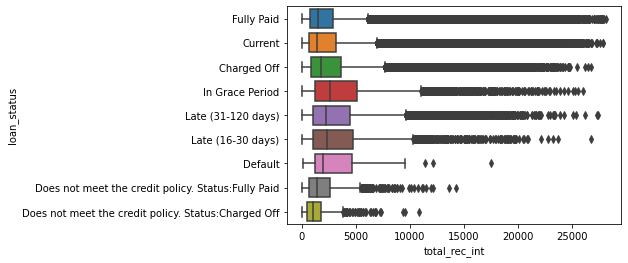

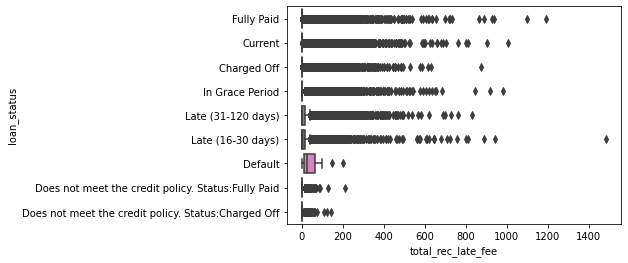

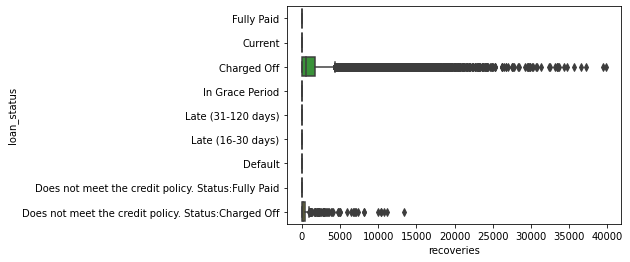

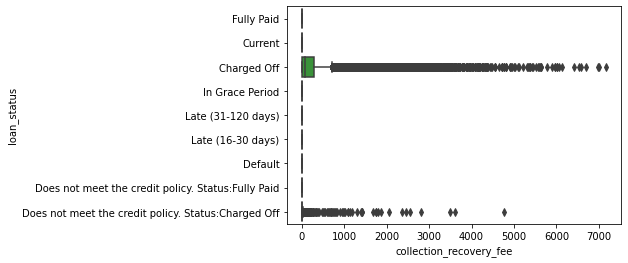

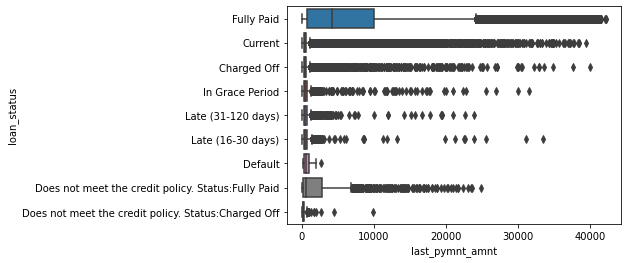

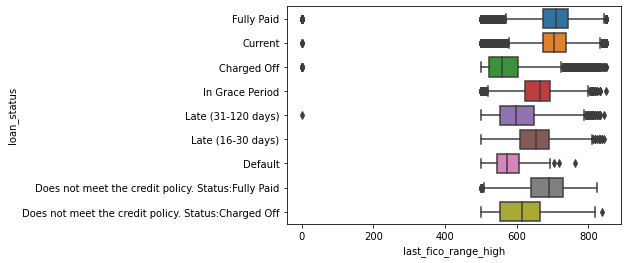

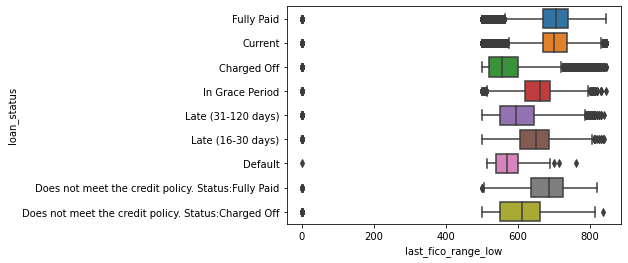

In [5]:
column_list = list(df.columns)
num_list=[]
obj_list=[]
for i in column_list:
    if df.dtypes[i] == float:
        num_list.append(i)
    else:
        obj_list.append(i)
a_num = num_list[0:7]
b_num = num_list[7:14]
c_num = num_list[14:21]
d_num = num_list[21:28]
e_num = num_list[28:]

# To avoid laptop crush, we do it 7 column a time
# From a_num to e_num, to check the column
for i in d_num:
    sns.boxplot(x=df[i], y=df['loan_status'])
    plt.show()

In [6]:
# Check categorical variable once
for i in obj_list:
  print(df.groupby([i]).size())

id
54734       1
55716       1
55742       1
56121       1
56705       1
           ..
99935627    1
9994715     1
99956528    1
99991359    1
99995024    1
Length: 2253339, dtype: int64
term
 36 months    1604206
 60 months     649133
dtype: int64
grade
A    432199
B    661941
C    648037
D    322906
E    134798
F     41477
G     11981
dtype: int64
sub_grade
A1     86660
A2     69423
A3     73012
A4     95684
A5    107420
B1    125035
B2    126329
B3    131217
B4    139451
B5    139909
C1    145484
C2    130701
C3    128821
C4    126699
C5    116332
D1     81438
D2     72577
D3     64506
D4     56617
D5     47768
E1     33427
E2     29726
E3     26540
E4     22587
E5     22518
F1     13324
F2      9229
F3      7734
F4      6071
F5      5119
G1      4056
G2      2656
G3      2068
G4      1666
G5      1535
dtype: int64
home_ownership
ANY             993
MORTGAGE    1108203
NONE             46
OTHER           180
OWN          252137
RENT         891780
dtype: int64
verification_status
No

In [7]:
# numeric variable

# deal with outlier
df_1 = df[df['dti']<100]
df_1 = df_1[df_1['annual_inc']<100000]
df_1 = df_1[df_1['revol_bal']<100000]
df_1= df_1[df_1['last_pymnt_amnt']<10000]

# all rows have same value
df_1 = df_1.drop('policy_code', axis=1)

# category variable

# useless variable
df_1 = df_1.drop('id', axis=1)
df_1 = df_1.drop('url', axis=1)
df_1 = df_1.drop('zip_code', axis=1)

# date value
df_1 = df_1.drop('issue_d', axis=1)
df_1 = df_1.drop('earliest_cr_line', axis=1)
df_1 = df_1.drop('last_pymnt_d', axis=1)
df_1 = df_1.drop('last_credit_pull_d', axis=1)



## Instead of drop the column with too many 0
# too many zero
## df_2 = df_1.drop('pub_rec', axis=1)
## df_2 = df_2.drop('delinq_2yrs', axis=1)
## df_2 = df_2.drop('total_rec_late_fee', axis=1)
## df_2 = df_2.drop('recoveries', axis=1)
## df_2 = df_2.drop('collection_recovery_fee', axis=1)
## df_2 = df_2.drop('delinq_amnt', axis=1)
## df_2 = df_2.drop('collections_12_mths_ex_med', axis=1)
## df_2 = df_2.drop('acc_now_delinq', axis=1)
## df_2 = df_2.drop('chargeoff_within_12_mths', axis=1)
## df_2 = df_2.drop('pub_rec_bankruptcies', axis=1)
## df_2 = df_2.drop('tax_liens', axis=1)

## we convert data to 0 or not 0
df_3 = df_1.copy()
df_3['pub_rec'] = np.where(df_1['pub_rec']>0,1,0)
df_3['delinq_2yrs'] = np.where(df_1['delinq_2yrs']>0,1,0)
df_3['total_rec_late_fee'] = np.where(df_1['total_rec_late_fee']>0,1,0)
df_3['recoveries'] = np.where(df_1['recoveries']>0,1,0)
df_3['collection_recovery_fee'] = np.where(df_1['collection_recovery_fee']>0,1,0)
df_3['delinq_amnt'] = np.where(df_1['delinq_amnt']>0,1,0)
df_3['collections_12_mths_ex_med'] = np.where(df_1['collections_12_mths_ex_med']>0,1,0)
df_3['acc_now_delinq'] = np.where(df_1['acc_now_delinq']>0,1,0)
df_3['chargeoff_within_12_mths'] = np.where(df_1['chargeoff_within_12_mths']>0,1,0)
df_3['pub_rec_bankruptcies'] = np.where(df_1['pub_rec_bankruptcies']>0,1,0)
df_3['tax_liens'] = np.where(df_1['tax_liens']>0,1,0)

In [8]:
## check the data type for categorical variables

column_list_2 = list(df_3.columns)
num_list_2=[]
obj_list_2=[]
for i in column_list_2:
    if df_3.dtypes[i] == float:
        num_list_2.append(i)
    else:
        obj_list_2.append(i)

for i in obj_list_2:
  print(df_3.groupby([i]).size())

term
 36 months    1193224
 60 months     384844
dtype: int64
grade
A    282268
B    472896
C    464529
D    232771
E     91323
F     26846
G      7435
dtype: int64
sub_grade
A1     50280
A2     45456
A3     49049
A4     64444
A5     73039
B1     86407
B2     88826
B3     93939
B4    100991
B5    102733
C1    105301
C2     94586
C3     91922
C4     90003
C5     82717
D1     59320
D2     52846
D3     46624
D4     40301
D5     33680
E1     22938
E2     20329
E3     18065
E4     14945
E5     15046
F1      8692
F2      5956
F3      4970
F4      3930
F5      3298
G1      2507
G2      1661
G3      1282
G4      1017
G5       968
dtype: int64
home_ownership
ANY            751
MORTGAGE    681225
NONE            39
OTHER          155
OWN         185233
RENT        710665
dtype: int64
verification_status
Not Verified       550778
Source Verified    603266
Verified           424024
dtype: int64
loan_status
Charged Off                                            221683
Current                       

In [9]:
df_3.shape # df_3 is the data ready for modeling
df_acc = df_3 # this code is passing my EDAed data to Hambo
df_acc.shape

(1578068, 48)

In [10]:
# subset x and y
y = df_acc['loan_status']
x = df_acc.drop(['loan_status'], axis=1)

# Creat Dummy Variables

In [11]:
# extract part of original data
# you can play with it!
x = x.iloc[:7000,:]
y = y.iloc[:7000]

In [12]:
# get a list of categorical columns
tmp = x.select_dtypes(include=['object'])
categoricals = tmp.columns

# creat dummy variables
for a in categoricals:
  x = pd.get_dummies(x, columns=[a], drop_first=True)

# verify
print(x.shape)
print(x.dtypes)
x.head() # 143 column

(7000, 143)
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
int_rate                      float64
installment                   float64
                               ...   
addr_state_WY                   uint8
initial_list_status_w           uint8
application_type_Joint App      uint8
hardship_flag_Y                 uint8
debt_settlement_flag_Y          uint8
Length: 143, dtype: object


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,...,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0,675.0,679.0,1.0,7.0,0,2765.0,29.7,13.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0,0,0,122.67,564.0,560.0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1,715.0,719.0,4.0,22.0,0,21470.0,19.2,38.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0,0,0,926.35,699.0,695.0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0,690.0,694.0,0.0,5.0,0,8822.0,68.4,6.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0,0,0,7653.56,759.0,755.0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,10000.0,10000.0,10000.0,6.49,306.45,85000.0,13.07,0,685.0,689.0,1.0,14.0,1,10464.0,34.5,23.0,0.0,0.0,10998.971575,10998.97,10000.0,998.97,0,0,0,1814.48,719.0,715.0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,8000.0,8000.0,8000.0,11.48,263.74,42000.0,34.80,0,700.0,704.0,0.0,8.0,0,7034.0,39.1,18.0,0.0,0.0,8939.580503,8939.58,8000.0,939.58,0,0,0,4996.24,679.0,675.0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Permutation Test

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import datasets
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance

# Tree models for classification 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

In [14]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [15]:
Y_train.nunique

<bound method IndexOpsMixin.nunique of 6552    Charged Off
6482     Fully Paid
6359     Fully Paid
4923    Charged Off
623         Current
           ...     
8615     Fully Paid
3970    Charged Off
865         Current
1933     Fully Paid
6498    Charged Off
Name: loan_status, Length: 5600, dtype: object>

In [16]:
clf_models = []
clf_models.append(('RF', RandomForestClassifier()))

In [17]:
for name, model in clf_models:
  exec(f'clf_{name} = model.fit(X_train, Y_train)')
  msg = "Model: clf_%s , Score:%.2f" % (name, model.score(X_train, Y_train))
  print(msg)
  print(confusion_matrix(Y_test, model.predict(X_test)))
  print('')

Model: clf_RF , Score:1.00
[[303   0  17   0]
 [  0 145   0   0]
 [  0   0 929   0]
 [  0   6   0   0]]



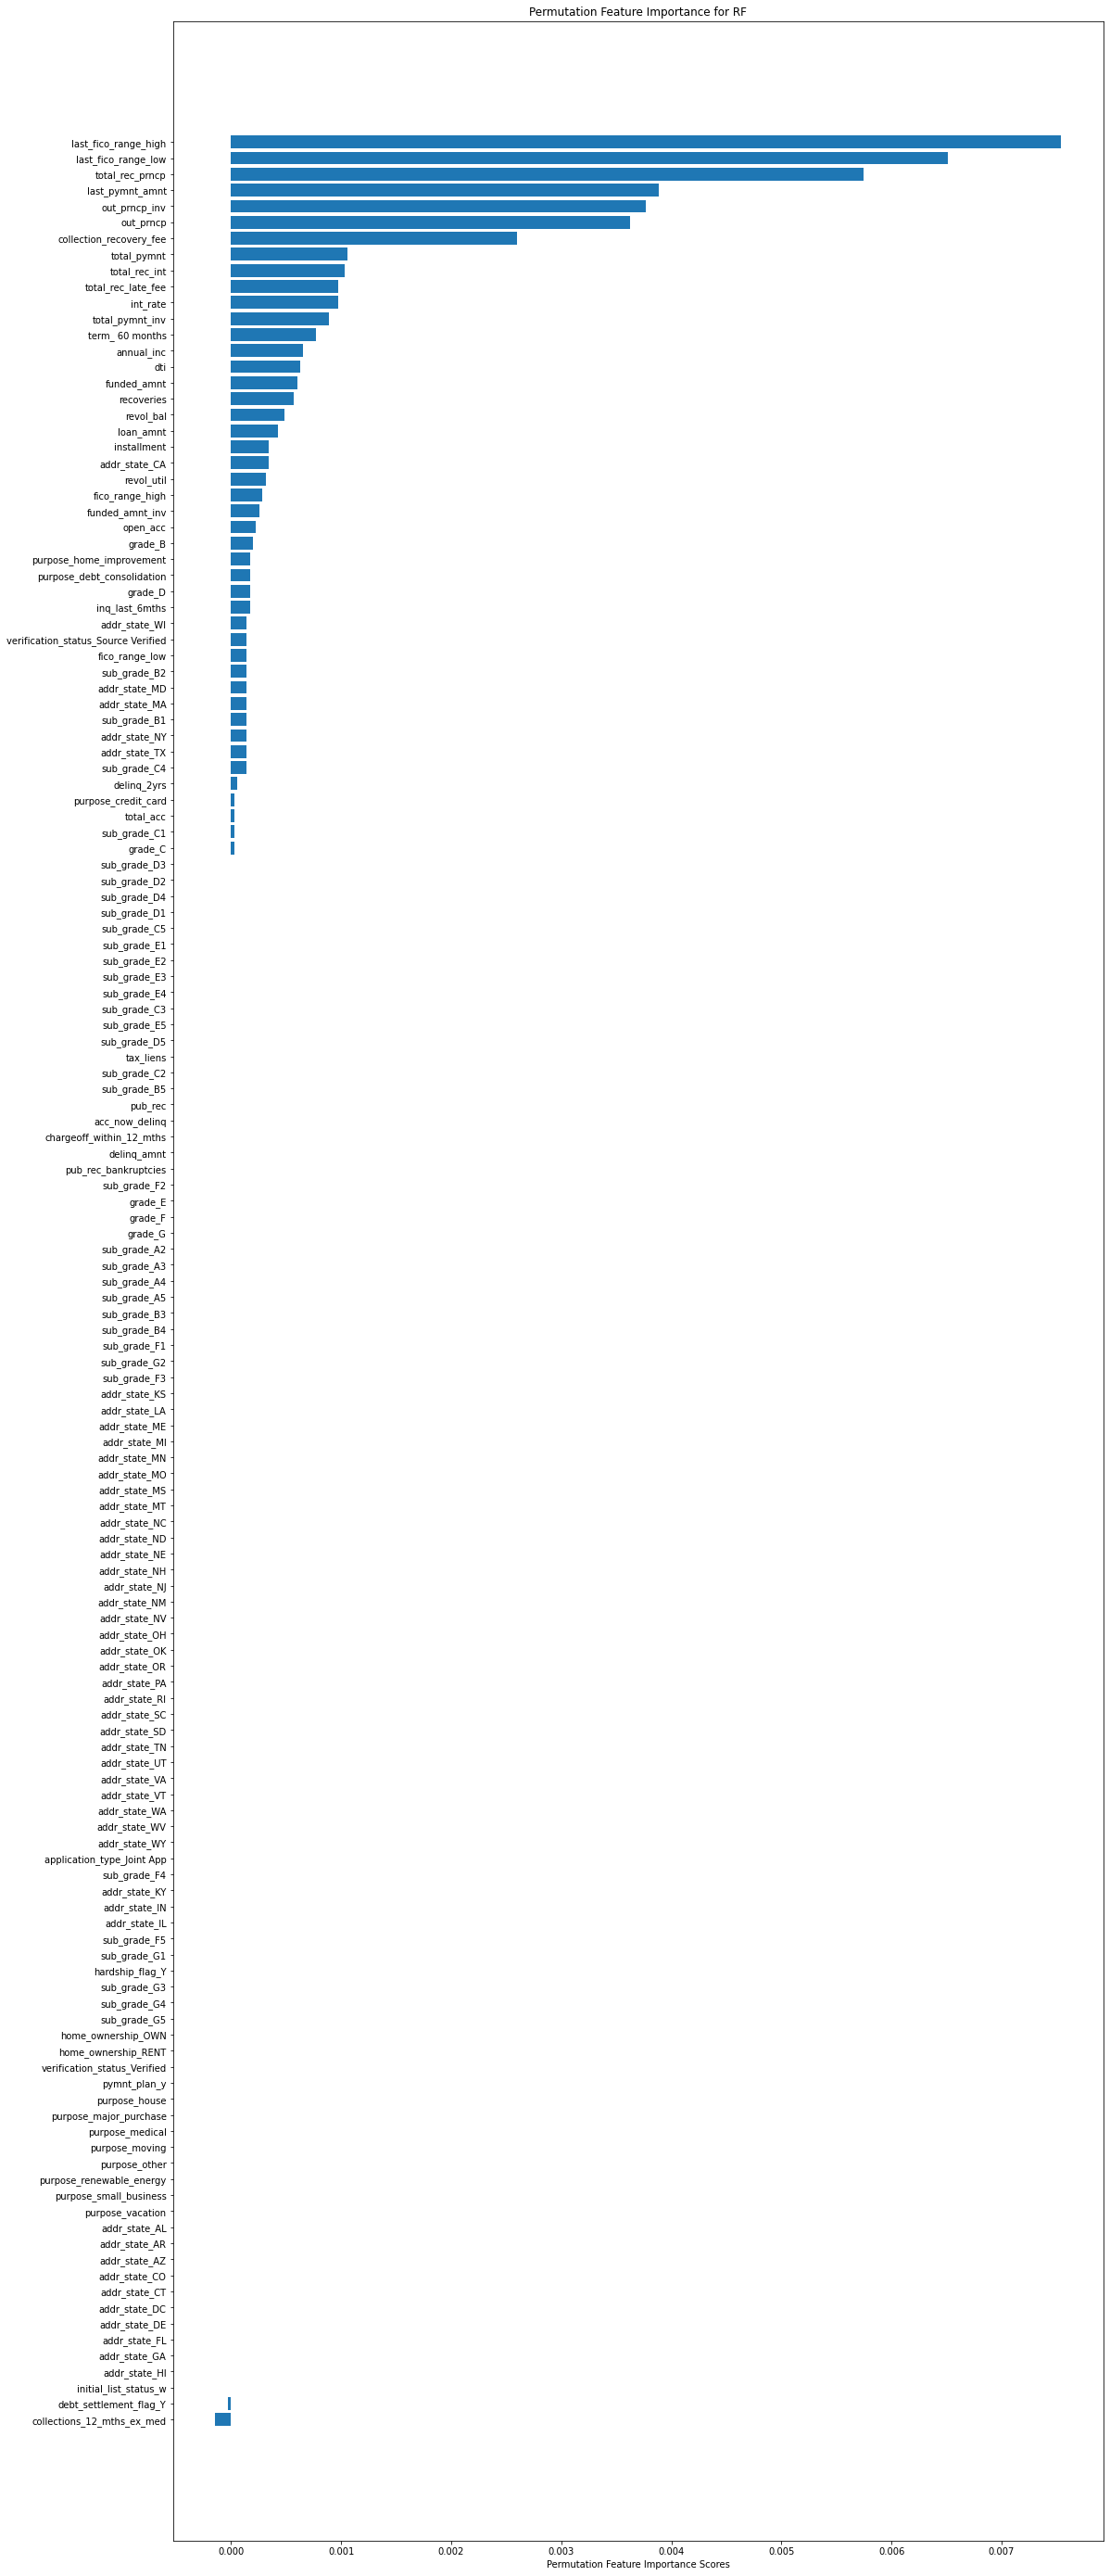

In [18]:
for name, model in clf_models:
  # perform permutation importance
  results = permutation_importance(model, x, y, scoring='accuracy')
  # get importance
  importance = results.importances_mean
  sorted_idx = np.argsort(importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplots(figsize=(18,50))
  plt.barh(pos, importance[sorted_idx], align='center')
  plt.yticks(pos, x.columns[sorted_idx])
  plt.xlabel('Permutation Feature Importance Scores')
  plt.title('Permutation Feature Importance for %s' % name)
  plt.show()

In [19]:
# subset top 20 important variables
# you can play with it!
a = list(x.columns[sorted_idx])
x = x[x.columns.intersection(a[123:])]
print(x.shape)

(7000, 20)


# Create polynomial features (and interactions).

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
print('original shape:')
print(x.shape)
x_poly = poly_features.fit_transform(x)
x_poly = pd.DataFrame(x_poly)
print('new shape:')
print(x_poly.shape)

original shape:
(7000, 20)
new shape:
(7000, 231)


In [21]:
# always reset index first
x.reset_index(inplace = True)
x_poly.reset_index(inplace = True)

In [22]:
# join datasets
x_giant = pd.concat([x, x_poly], axis=1) 
x_giant = x_giant.drop(['index'], axis=1)
x_giant.head()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,term_ 60 months,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230
0,3600.0,3600.0,13.99,123.03,55000.0,5.91,2765.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0,0,0,122.67,564.0,560.0,0,1.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,2765.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,...,441612.0,2030400.0,2016000.0,0.0,6.752238e+05,0.0,0.0,0.0,1.008004e+05,463450.08,460163.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.504793e+04,69185.88,68695.20,0.0,318096.0,315840.0,0.0,313600.0,0.0,0.0
1,24700.0,24700.0,11.99,820.28,65000.0,16.06,21470.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0,0,0,926.35,699.0,695.0,0,1.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,21470.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,...,22880845.0,17265300.0,17166500.0,0.0,9.597337e+05,0.0,0.0,0.0,9.075080e+05,684782.34,680863.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.581243e+05,647518.65,643813.25,0.0,488601.0,485805.0,0.0,483025.0,0.0,0.0
2,11950.0,11950.0,13.44,405.18,34000.0,10.20,8822.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0,0,0,7653.56,759.0,755.0,0,1.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,8822.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,...,91460042.0,9070050.0,9022250.0,0.0,3.093905e+06,0.0,0.0,0.0,1.346223e+07,1335043.05,1328007.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.857698e+07,5809052.04,5778437.80,0.0,576081.0,573045.0,0.0,570025.0,0.0,0.0
3,10000.0,10000.0,6.49,306.45,85000.0,13.07,10464.0,0.0,0.0,10998.971575,10998.97,10000.0,998.97,0,0,0,1814.48,719.0,715.0,0,1.0,10000.0,10000.0,6.49,306.45,85000.0,13.07,10464.0,0.0,0.0,10998.971575,10998.97,10000.0,998.97,0.0,0.0,0.0,1814.48,719.0,715.0,...,18144800.0,7190000.0,7150000.0,0.0,9.979411e+05,0.0,0.0,0.0,1.812611e+06,718259.43,714263.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.292338e+06,1304611.12,1297353.20,0.0,516961.0,514085.0,0.0,511225.0,0.0,0.0
4,8000.0,8000.0,11.48,263.74,42000.0,34.80,7034.0,0.0,0.0,8939.580503,8939.58,8000.0,939.58,0,0,0,4996.24,679.0,675.0,0,1.0,8000.0,8000.0,11.48,263.74,42000.0,34.80,7034.0,0.0,0.0,8939.580503,8939.58,8000.0,939.58,0.0,0.0,0.0,4996.24,679.0,675.0,...,39969920.0,5432000.0,5400000.0,0.0,8.828106e+05,0.0,0.0,0.0,4.694367e+06,637974.82,634216.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.496241e+07,3392446.96,3372462.00,0.0,461041.0,458325.0,0.0,455625.0,0.0,0.0


# Data Splitting

In [23]:
# x_giant = x_giant.values
# y = y.values
validation_size = 0.20
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(x_giant, y, stratify=y, test_size=validation_size, random_state=seed)

In [24]:
X_train.shape

(5600, 251)

# Spot Check

In [25]:
# Load libraries
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
# classification model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import time

In [26]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))

ScaledLR: 0.988571 (0.004165)
ScaledRFC: 0.981607 (0.004304)
ScaledGBC: 0.981071 (0.004532)
ScaledETC: 0.983393 (0.004076)
ScaledDTC: 0.965714 (0.009643)
ScaledSVC: 0.975893 (0.004169)
ScaledLDA: 0.974107 (0.004605)
ScaledGNB: 0.888750 (0.032879)


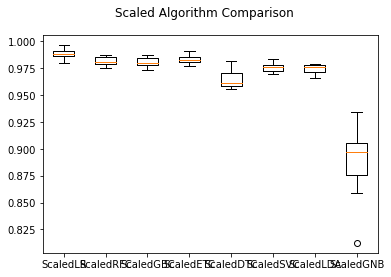

spot check finished in 1018.6587491035461 seconds


In [27]:
start_time = time.time()
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(max_iter=1000000))])))
pipelines.append(('ScaledRFC', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))
pipelines.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier())])))
pipelines.append(('ScaledETC', Pipeline([('Scaler', StandardScaler()),('ETC', ExtraTreesClassifier())])))
pipelines.append(('ScaledDTC', Pipeline([('Scaler', StandardScaler()),('DTC', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledGNB', Pipeline([('Scaler', StandardScaler()),('GNB', GaussianNB())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed,
               shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, 
                              cv=kfold, 
                              scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
end_time = time.time()
# print run time
print('spot check finished in %s seconds' % (end_time - start_time))
# ScaledLR is the best

# Hyperparameter Tuning

In [28]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Construct pipeline
pipe = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.95)),
			('clf', LogisticRegression())])

In [30]:
# Set grid search params
# you can play with it!
param_range = [100e1000000000001, 100e1000000000004, 100e1000000000007]
tols = [1e-4, 1e-5, 1e-6, 1e-7]
grid_params = [{'clf__penalty': ['l2', 'none'], 
		'clf__tol': tols,
		'clf__max_iter': param_range}]

In [31]:
# Construct grid search
gs = GridSearchCV(estimator=pipe,
			param_grid=grid_params,
			scoring='accuracy')

In [32]:
# Fit using grid search
start_time = time.time()
gs.fit(X_train, Y_train.ravel())
end_time = time.time()

# print run time
print('grid search finished in %s seconds' % (end_time - start_time))

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

grid search finished in 3579.14937376976 seconds
Best accuracy: 0.988

Best params:
 {'clf__max_iter': inf, 'clf__penalty': 'none', 'clf__tol': 0.0001}


# Fit Best Model

In [33]:
Model = LogisticRegression(penalty = 'none', max_iter = float('inf'), tol = 0.0001)
Model.fit(X_train, Y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=inf,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
Model.score(X_test, Y_test.ravel())

0.99

In [35]:
## pd.DataFrame(Y_train).groupby('loan_status').size()
## pd.DataFrame(Y_test).groupby('loan_status').size()

In [36]:
from sklearn.metrics import classification_report

# check model performance on hold-out data
predictions = Model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.99
[[293   1   0   0   0   0]
 [  0 150   1   2   1   1]
 [  0   1 939   0   0   1]
 [  0   1   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   4   0   0   1   4]]
                    precision    recall  f1-score   support

       Charged Off       1.00      1.00      1.00       294
           Current       0.96      0.97      0.96       155
        Fully Paid       1.00      1.00      1.00       941
   In Grace Period       0.00      0.00      0.00         1
 Late (16-30 days)       0.00      0.00      0.00         0
Late (31-120 days)       0.67      0.44      0.53         9

          accuracy                           0.99      1400
         macro avg       0.60      0.57      0.58      1400
      weighted avg       0.99      0.99      0.99      1400



# Refit on Entire Rows
Check overfitting

In [37]:
# subset x and y
new_y = df_acc['loan_status']
new_x = df_acc.drop(['loan_status'], axis=1)

In [38]:
# change dtype
changed_type_list = ['delinq_2yrs', 'pub_rec', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']

for i in changed_type_list:
    new_x[i] = new_x[i].astype(float)

In [39]:
# get a list of categorical columns
tmp = new_x.select_dtypes(include=['object'])
categoricals = tmp.columns

# creat dummy variables
for a in categoricals:
  new_x = pd.get_dummies(new_x, columns=[a], drop_first=True)

In [40]:
new_x.shape

(1578068, 151)

In [41]:
# subset top 20 important variables
# you can play with it!
a = list(new_x.columns[sorted_idx])
new_x = new_x[new_x.columns.intersection(a[123:])]
print(new_x.shape)

(1578068, 20)


In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
print('original shape:')
print(new_x.shape)
new_x_poly = poly_features.fit_transform(new_x)
new_x_poly = pd.DataFrame(new_x_poly)
print('new shape:')
print(new_x_poly.shape)

original shape:
(1578068, 20)
new shape:
(1578068, 231)


In [43]:
# join datasets
new_x_giant = pd.concat([new_x, new_x_poly], axis=1) 
#x_train_giant = x_train_giant.drop(['index'], axis=1)
new_x_giant.head()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,term_ 60 months,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230
0,3600.0,3600.0,13.99,123.03,55000.0,5.91,2765.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,2765.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,...,441612.0,2030400.0,2016000.0,0.0,6.752238e+05,0.0,0.0,0.0,1.008004e+05,463450.08,460163.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.504793e+04,69185.88,68695.20,0.0,318096.0,315840.0,0.0,313600.0,0.0,0.0
1,24700.0,24700.0,11.99,820.28,65000.0,16.06,21470.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,21470.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,...,22880845.0,17265300.0,17166500.0,0.0,9.597337e+05,0.0,0.0,0.0,9.075080e+05,684782.34,680863.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.581243e+05,647518.65,643813.25,0.0,488601.0,485805.0,0.0,483025.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,8822.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,...,91460042.0,9070050.0,9022250.0,0.0,3.093905e+06,0.0,0.0,0.0,1.346223e+07,1335043.05,1328007.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.857698e+07,5809052.04,5778437.80,0.0,576081.0,573045.0,0.0,570025.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10000.0,10000.0,6.49,306.45,85000.0,13.07,10464.0,0.0,0.0,10998.971575,10998.97,10000.0,998.97,0.0,0.0,0.0,1814.48,719.0,715.0,...,18144800.0,7190000.0,7150000.0,0.0,9.979411e+05,0.0,0.0,0.0,1.812611e+06,718259.43,714263.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.292338e+06,1304611.12,1297353.20,0.0,516961.0,514085.0,0.0,511225.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8000.0,8000.0,11.48,263.74,42000.0,34.80,7034.0,0.0,0.0,8939.580503,8939.58,8000.0,939.58,0.0,0.0,0.0,4996.24,679.0,675.0,...,39969920.0,5432000.0,5400000.0,0.0,8.828106e+05,0.0,0.0,0.0,4.694367e+06,637974.82,634216.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.496241e+07,3392446.96,3372462.00,0.0,461041.0,458325.0,0.0,455625.0,0.0,0.0


In [ ]:
# x_giant = x_giant.values
# y = y.values
validation_size = 0.20
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(new_x_giant, new_y, stratify=new_y, test_size=validation_size, random_state=seed)

In [ ]:
X_train.shape

(1262454, 251)

In [ ]:
Model.score(X_test, Y_test.ravel())

0.6278777240553334